# Precision, Recall, and Decision Thresholds

In this notebook, we move beyond accuracy and study how classification decisions
depend on the choice of decision threshold.

Using MNIST digit classification (5 vs not-5), we demonstrate:
- why classifiers output scores rather than labels
- how precision and recall trade off against each other
- how changing the decision threshold changes model behavior

This notebook focuses on *decision-making*, not model optimization.


## Problem Framing

We frame MNIST as a binary classification problem:
- Positive class: digit "5"
- Negative class: all other digits

Only about 10% of samples belong to the positive class, making this an
imbalanced classification problem where accuracy is insufficient.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score


In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

y_is_5 = (y == 5)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y_is_5[:60000], y_is_5[60000:]


## Training a Linear Classifier

We use a simple linear classifier (SGDClassifier) not for performance,
but because it exposes raw decision scores, which are essential for
understanding threshold-based decisions.


In [3]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


## Decision Scores vs Predictions

Instead of directly predicting class labels, classifiers internally compute
a continuous score representing confidence.

A prediction is obtained by comparing this score to a decision threshold.


In [4]:
y_scores = sgd_clf.decision_function(X_train)
y_scores[:10]


array([  2164.22030239,  -5897.37359354, -13489.14805779,  -4623.84515943,
        -6873.05248453,  -3908.27576291,  -4851.9422397 ,  -4988.52407755,
        -2226.78132866,  -4081.33692831])

## Baseline: Default Threshold

By default, predictions are made using a threshold of 0.


In [5]:
y_pred_default = (y_scores >= 0)

precision_score(y_train, y_pred_default), recall_score(y_train, y_pred_default)

(0.6805026118876183, 0.8891348459693783)

### Interpretation

At the default threshold, the classifier balances precision and recall
according to its internal optimization objective. However, this balance
may not align with real-world costs of false positives and false negatives.


## Effect of Increasing the Decision Threshold

We now increase the threshold, making the classifier more conservative
when predicting the positive class.


In [6]:
high_threshold = 3000
y_pred_high_thresh = (y_scores >= high_threshold)

precision_score(y_train, y_pred_high_thresh), recall_score(y_train, y_pred_high_thresh)


(0.9390070921985816, 0.610588452315071)

### Interpretation

Increasing the threshold reduces the number of predicted positives.
As a result:
- Precision increases (fewer false positives)
- Recall decreases (more false negatives)

This demonstrates the fundamental trade-off between precision and recall.


## Precision–Recall Curve

Rather than manually selecting thresholds, we can visualize the full
precision–recall trade-off across all possible thresholds.


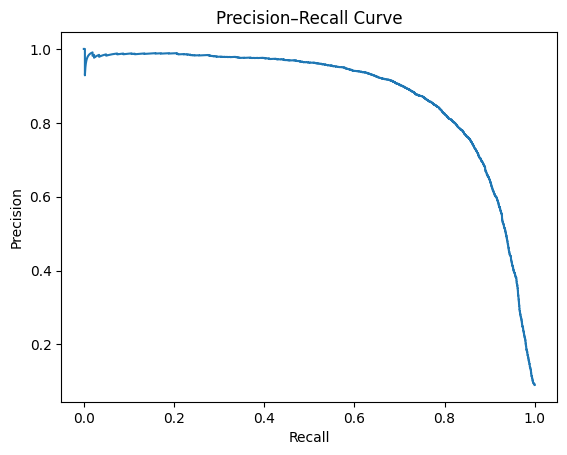

In [7]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


### How to Read This Curve

Each point on the curve corresponds to a different decision threshold.

- Left side: high precision, low recall
- Right side: high recall, low precision

There is no universally optimal point; the correct operating point depends
on the relative cost of false positives and false negatives.


## Key Takeaways

- Classifiers produce scores, not decisions.
- Decision thresholds control the trade-off between precision and recall.
- Precision and recall cannot be maximized simultaneously.
- Choosing a threshold is a business and risk decision, not a modeling one.
- Precision–recall curves provide a complete picture of possible trade-offs.
